# Exercise 02 : Bar

In [1]:
import pandas as pd
import sqlite3

In [2]:
try:
    connection = sqlite3.connect('../data/checking-logs.sqlite.sqlite')
    print("Successfully connect to the database")
except sqlite3.Error as error:
    print("Error when connecting to the database", error)

Successfully connect to the database


## • analyze only the users and not the admins
## • the fontsize and the ﬁgsize are still the same
## • night is from 0:00:00 to 03:59:59, morning is from 04:00:00 to 09:59:59, afternoon is from 10:00:00 to 16:59:59, evening is from 17:00:00 to 23:59:59
## • choose a palette that you really enjoy, you do not have to replicate it from the graph above

In [3]:
query = "select timestamp from checker where uid like 'user_%'"
c = pd.io.sql.read_sql(query, connection)
commits = pd.DataFrame(pd.to_datetime(c['timestamp']).dt.date)
commits['hour'] = pd.to_datetime(c['timestamp']).dt.hour
labels = ['night', 'morning', 'afternoon', 'evening']
bins = [0, 4, 10, 17, 24]
commits['daytime'] = pd.cut(commits['hour'], labels=labels, bins=bins, include_lowest=True, right=False)
commits.rename(columns={'timestamp': 'date'}, inplace=True)
commits = commits.groupby(['date', 'daytime']).count().reset_index()
commits

,date,daytime,hour
0,2020-04-17,night,0
1,2020-04-17,morning,13
2,2020-04-17,afternoon,10
3,2020-04-17,evening,0
4,2020-04-18,night,0
...,...,...,...
135,2020-05-20,evening,10
136,2020-05-21,night,0
137,2020-05-21,morning,1
138,2020-05-21,afternoon,27


In [4]:
commits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   date     140 non-null    object  
 1   daytime  140 non-null    category
 2   hour     140 non-null    int64   
dtypes: category(1), int64(1), object(1)
memory usage: 2.6+ KB


In [5]:
connection.close()

In [6]:
commits = pd.pivot(commits, index ='date', columns='daytime', values='hour')
commits

daytime,night,morning,afternoon,evening
date,,,,
2020-04-17,0,13,10,0
2020-04-18,0,1,33,35
2020-04-19,2,4,16,11
2020-04-20,0,0,12,13
2020-04-21,0,0,0,25
2020-04-22,0,0,4,24
2020-04-23,2,6,15,20
2020-04-24,0,0,4,12
2020-04-25,1,21,33,49


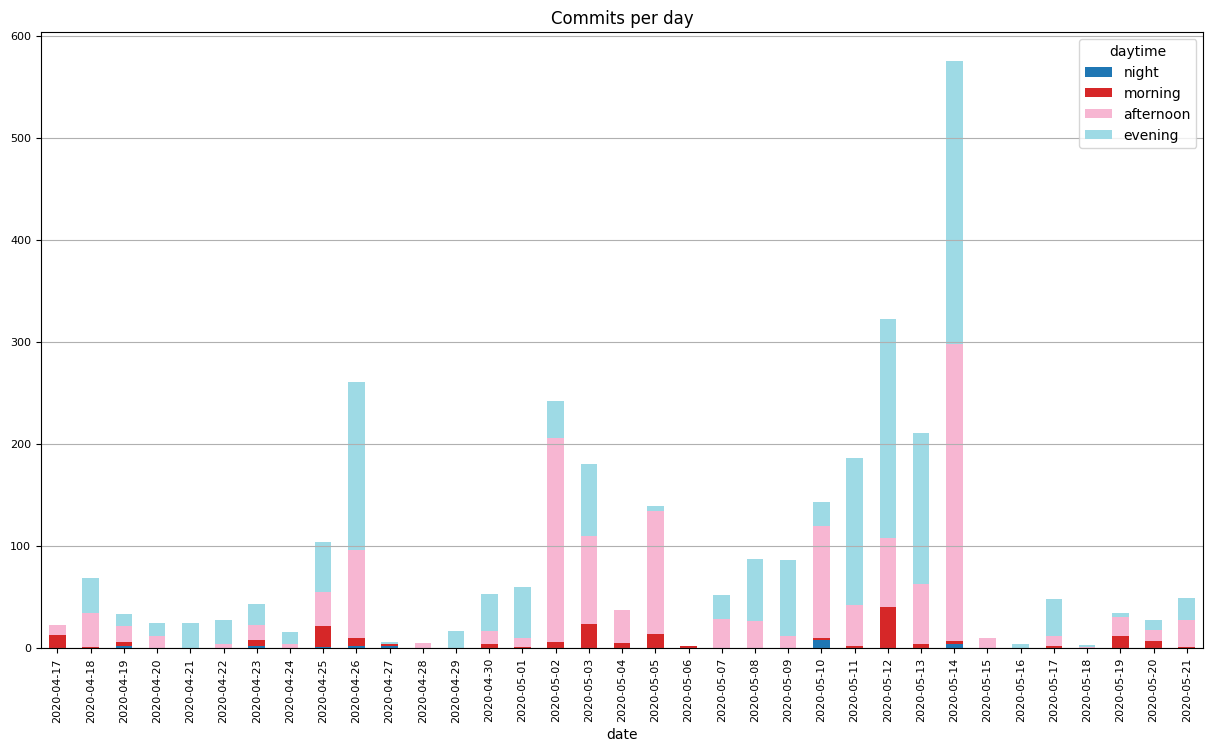

In [7]:
commits.plot(kind='bar', stacked=True, fontsize=8, figsize=(15,8), title='Commits per day', rot = 90, colormap='tab20').grid(axis='y')

## • at the end of your Jupyter Notebook, create a markdown cell and insert the questions:

◦ “When do our users usually commit the labs: in the night, morning, afternoon, or evening?”, the answer is the two most common periods.

◦ Which day has:

∗ the most number of commits

∗ and at the same time, the number of commits in the evening is higher than in the afternoon?

The answer is the date of that day.

In [8]:
commits.sum()

daytime
night          21
morning       184
afternoon    1391
evening      1611
dtype: int64

When do our users usually commit the labs: in the night, morning, afternoon, or evening?

- Answer: the two most common periods of the day: evening and afternoon

In [9]:
commits.loc[commits['evening'] > commits['afternoon']].sum(axis=1).idxmax()

datetime.date(2020, 5, 12)

Which day has:

∗ the most number of commits

∗ and at the same time, the number of commits in the evening is higher than in the afternoon?

The answer is the date of that day.

- Answer: 2020-05-12